In [1]:
!pip install umap-learn


# GloVe: Global Vectors for Word Representation file: glove.6B.zip
# file which contains the word vectors with dimension 50
# A function that takes as argument a word and returns the 20 most similar words by cosine similarity.
# A function that takes as arguments a list of words and returns the corresponding vectors in a numpy array.
# Then use the utility function below to plot the vectors.
# When testing your code try to use lists of words that contain groups of semantically close words.

In [2]:
### Assignment on Word Embeddings

from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cosine
from numpy.random import default_rng

In [3]:
# Define the plotting function using UMAP
def plot_word_embeddings(words, vectors, num_neighbors=2):
    """
    Utility function to do a 2d plot of word-embeddings with annotations.
    param words: list of words
    param vectors: array of word embeddings corresponding to the list of words
    param num_neighbors: number of neighbors to consider in the UMAP projection
    """
    V_umap = UMAP(n_neighbors=num_neighbors, min_dist=0.2).fit_transform(vectors)
    plt.figure(figsize=(12, 6))
    plt.scatter(V_umap[:, 0], V_umap[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
    plt.show()


In [4]:
# Function to load GloVe vectors
def load_glove_vectors(glove_file):
    """
    Load the GloVe vectors from a given file into a dictionary.
    Each line in the file represents a word and its corresponding vector.
    """
    embeddings_dict = {}
    with open(glove_file, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_dict[word] = vector
    return embeddings_dict

In [5]:
# Function to find the top 20 most similar words based on cosine similarity
def find_similar_words(target_word, embeddings_dict, top_n=20):
    """
    Find the top_n most similar words to the target_word based on cosine similarity.
    """
    if target_word not in embeddings_dict:
        return "Word not in dictionary."
    
    target_vec = embeddings_dict[target_word]
    similarities = {}
    
    for word, vector in embeddings_dict.items():
        if word == target_word:
            continue
        sim = 1 - cosine(target_vec, vector)
        similarities[word] = sim
    # Sort words by similarity
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return [word for word, _ in sorted_similarities[:top_n]]

In [6]:
# Function to retrieve vectors for a list of words
def get_vectors(words, embeddings_dict):
    """
    Get the vectors for a list of words from the embeddings dictionary.
    """
    vectors = np.array([embeddings_dict[word] for word in words if word in embeddings_dict])
    return vectors

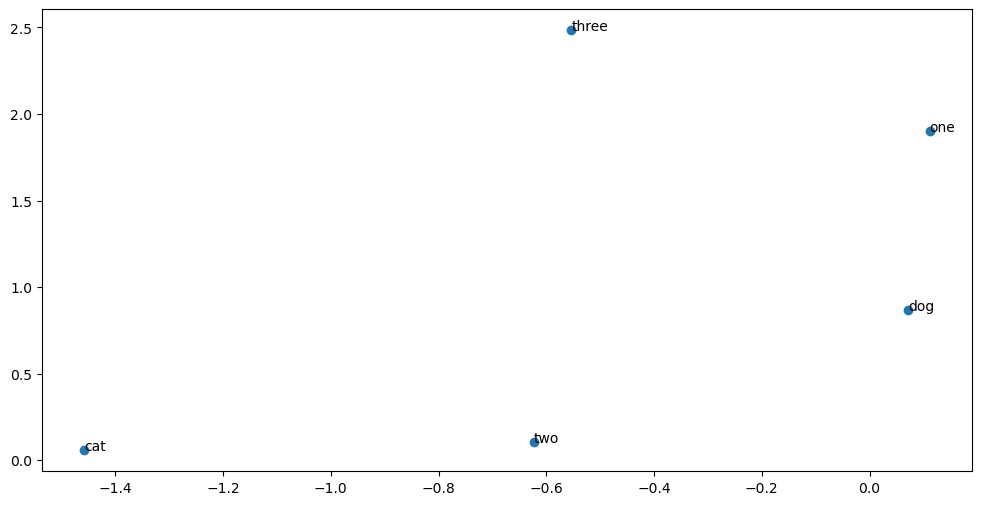

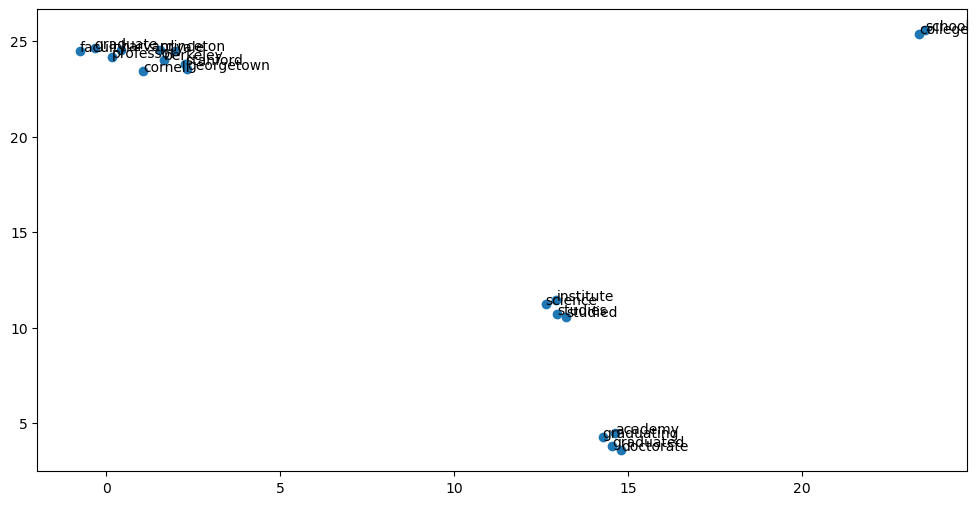

In [7]:
# Example usage of the full functionality
if __name__ == "__main__":
    
    glove_path = 'dataglove/glove.6B.50d.txt' 
    embeddings = load_glove_vectors(glove_path)
    
    # Test the plotting function with random data
    rng = default_rng()
    test_words = ["cat", "dog", "one", "two", "three"]
    test_embeddings = rng.uniform(size=(len(test_words), 50))
    plot_word_embeddings(test_words, test_embeddings)

    # Find similar words and plot their embeddings
    target_word = 'university'  # Change the target word for different examples
    similar_words = find_similar_words(target_word, embeddings)
    similar_vectors = get_vectors(similar_words, embeddings)
    plot_word_embeddings(similar_words, similar_vectors)


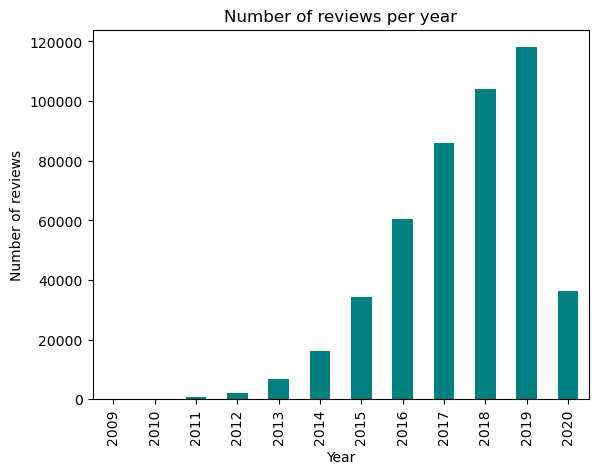

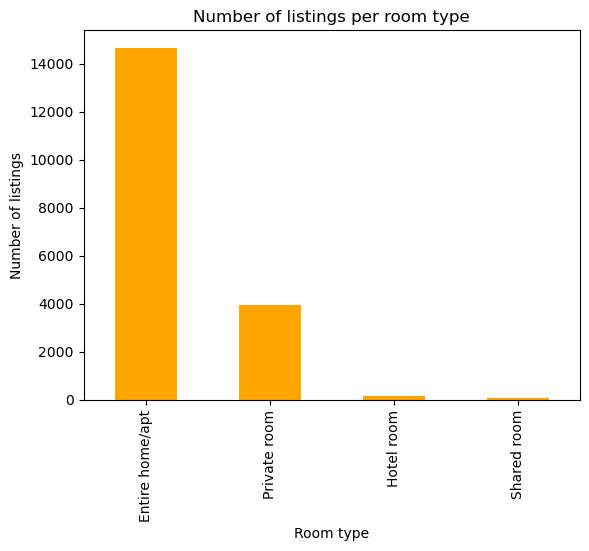

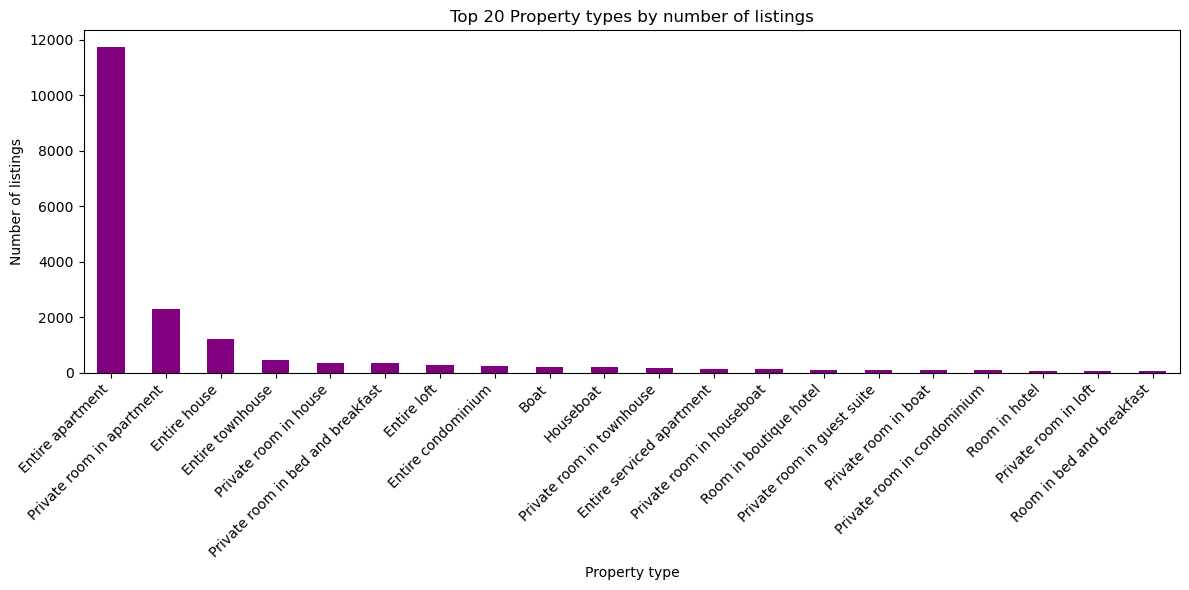

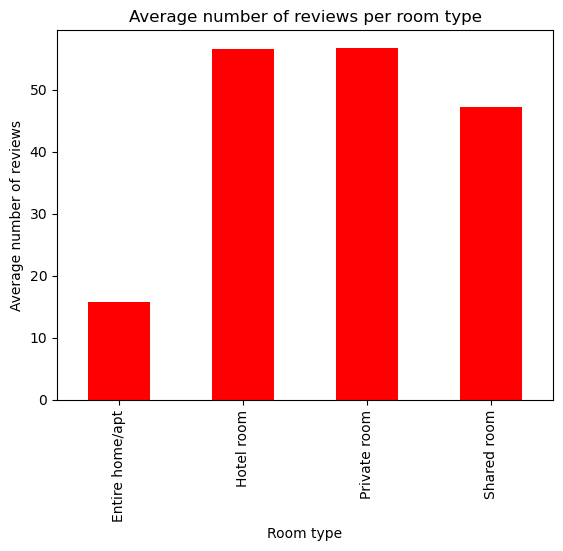

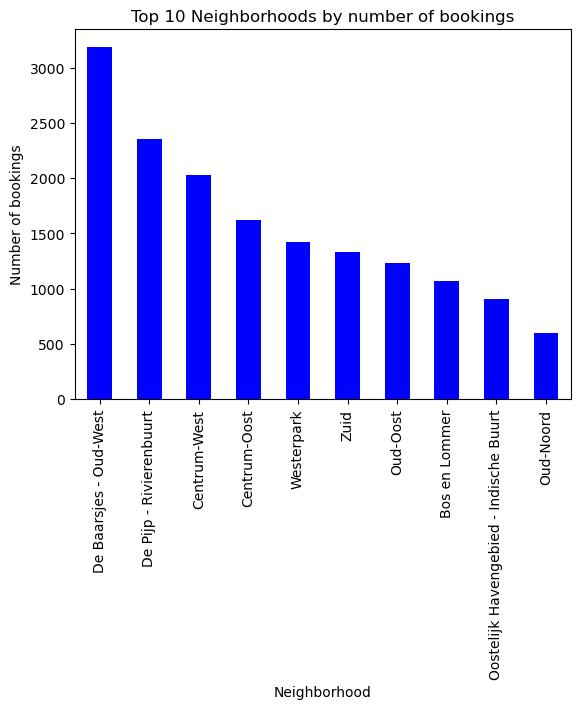

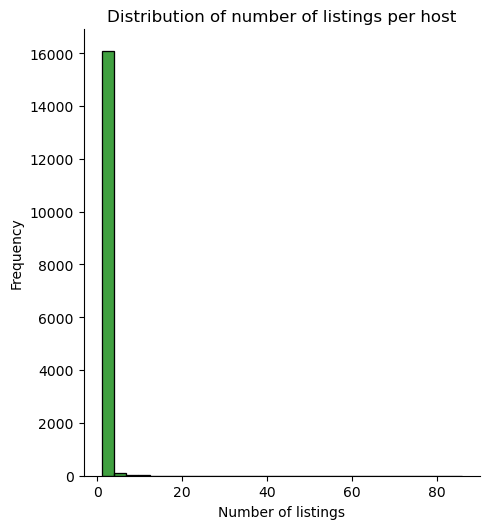

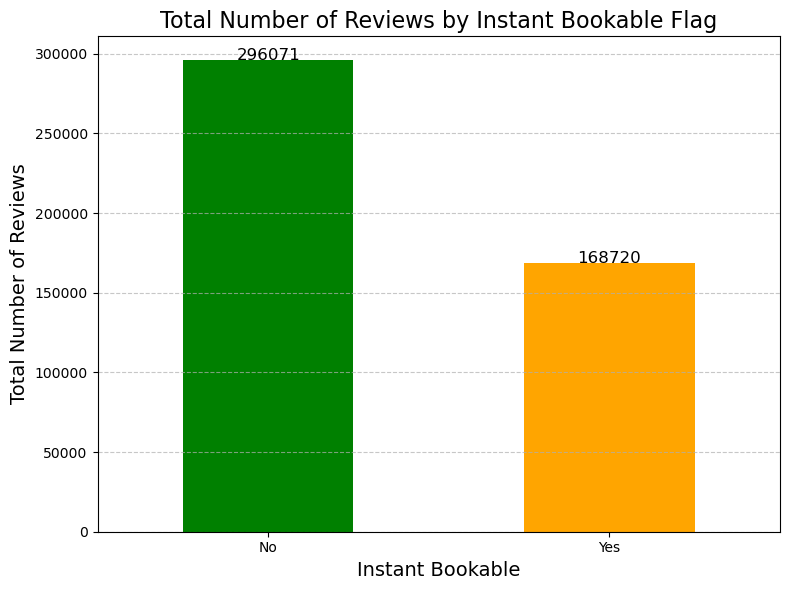

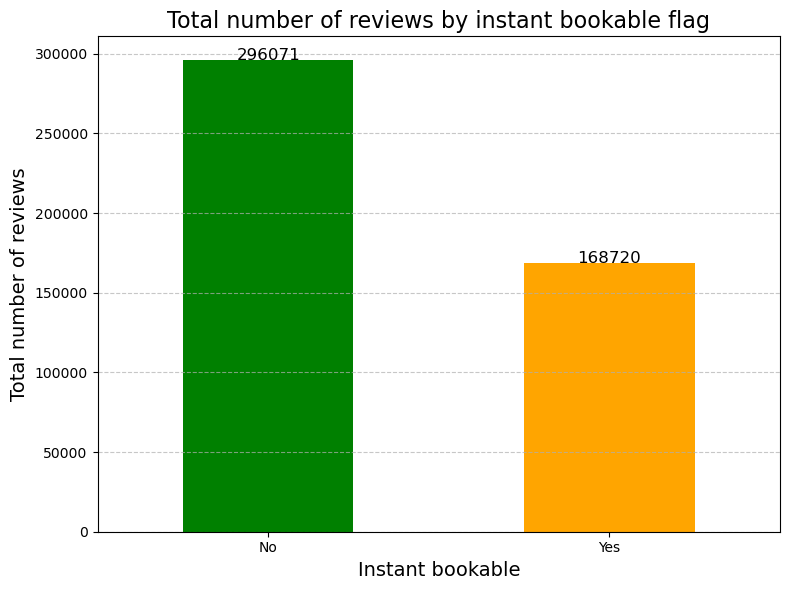

C:\Users\Platanias\AppData\Local\Temp\ipykernel_1028\2469164373.py:138: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


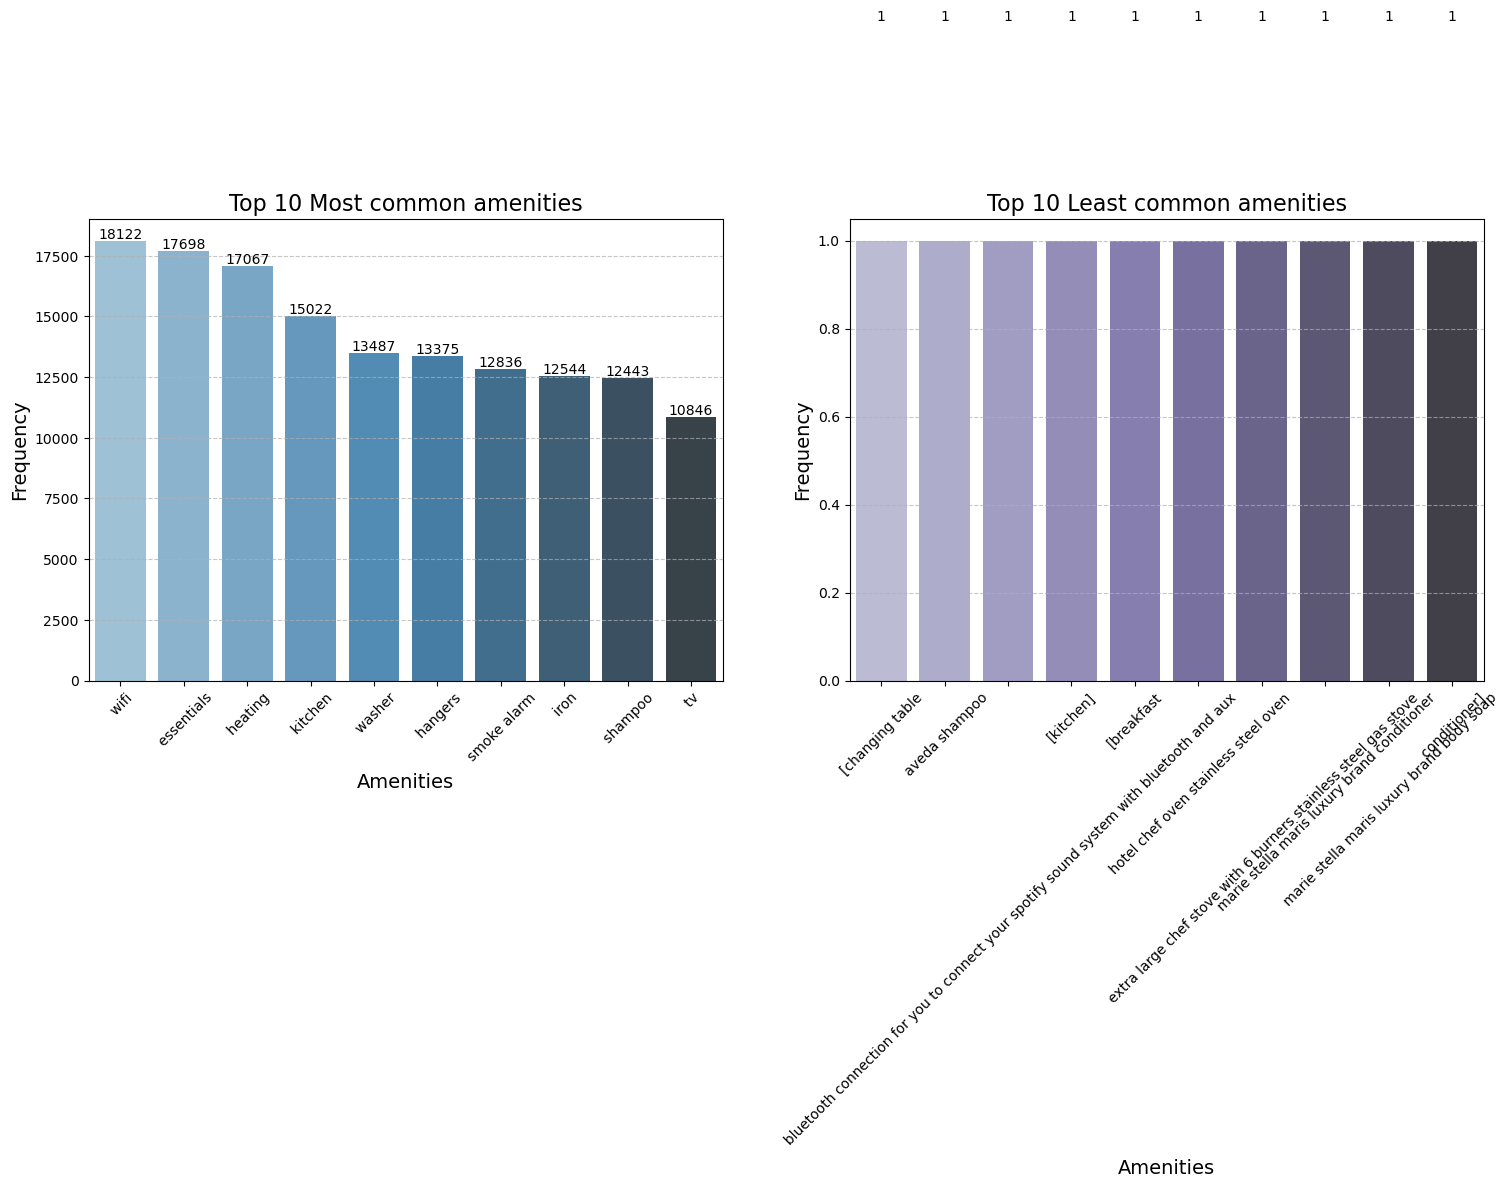

In [12]:
### Inside Airbnb
# public data from AirBnb, dataset from Amsterdam listings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
listings_amsterdam = pd.read_csv("data/listings_Amsterdam.csv.gz", compression="gzip")
reviews_amsterdam = pd.read_csv("data/reviews_Amsterdam.csv.gz", compression="gzip")

# Convert date to datetime and extract year in reviews dataset
reviews_amsterdam['date'] = pd.to_datetime(reviews_amsterdam['date'])
reviews_amsterdam['year'] = reviews_amsterdam['date'].dt.year

# 1. Calculate how many reviews per year have the listings in total. Plot, the result.
reviews_per_year = reviews_amsterdam.groupby('year').size()
reviews_per_year.plot(kind='bar', color='teal')
plt.title('Number of reviews per year')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.show()

# 2. Plot the number of listings per room-type.
listings_per_room_type = listings_amsterdam['room_type'].value_counts()
listings_per_room_type.plot(kind='bar', color='orange')
plt.title('Number of listings per room type')
plt.xlabel('Room type')
plt.ylabel('Number of listings')
plt.show()

# 3.Plot the number of bookings per property type.
top_20_property_types = listings_amsterdam['property_type'].value_counts().head(20)
top_20_property_types.plot(kind='bar', color='purple', figsize=(12, 6))
plt.title('Top 20 Property types by number of listings')
plt.xlabel('Property type')
plt.ylabel('Number of listings')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

# 4. Plot the average number of reviews per room-type.
avg_reviews_room_type = listings_amsterdam.groupby('room_type')['number_of_reviews'].mean()
avg_reviews_room_type.plot(kind='bar', color='red')
plt.title('Average number of reviews per room type')
plt.xlabel('Room type')
plt.ylabel('Average number of reviews')
plt.show()

# 5.Calculate the total number of bookings per neighborhood and plot the top 10 in decreasing order.
bookings_per_neighborhood = listings_amsterdam['neighbourhood_cleansed'].value_counts().head(10)
bookings_per_neighborhood.plot(kind='bar', color='blue')
plt.title('Top 10 Neighborhoods by number of bookings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of bookings')
plt.show()

# 6. Find the average number of listings per host and plot the distribution.
average_listings_per_host = listings_amsterdam.groupby('host_id').size().mean()
sns.displot(listings_amsterdam.groupby('host_id').size(), bins=30, kde=False, color='green')
plt.title('Distribution of number of listings per host')
plt.xlabel('Number of listings')
plt.ylabel('Frequency')
plt.show()

# 7. Calculate the total number of reviews for each listing and plot the distribution.
listings_amsterdam['instant_bookable'] = listings_amsterdam['instant_bookable'].map({'f': 'No', 't': 'Yes'})
reviews_per_instant_bookable = listings_amsterdam.groupby('instant_bookable')['number_of_reviews'].sum()


reviews_per_instant_bookable.plot(kind='bar', color=['green', 'orange'], figsize=(8, 6))
plt.title('Total Number of Reviews by Instant Bookable Flag', fontsize=16)
plt.xlabel('Instant Bookable', fontsize=14)
plt.ylabel('Total Number of Reviews', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(reviews_per_instant_bookable):
    plt.text(i, value + 50, str(value), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# 8. Calculate the total number of reviews per instant_bookable flag.
reviews_per_instant_bookable.plot(kind='bar', color=['green', 'orange'], figsize=(8, 6))
plt.title('Total number of reviews by instant bookable flag', fontsize=16)
plt.xlabel('Instant bookable', fontsize=14)
plt.ylabel('Total number of reviews', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, value in enumerate(reviews_per_instant_bookable):
    plt.text(i, value + 50, str(value), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# 9. Find the 10 most common amenities and the 10 least frequent ones across the listings. Plot their counts.

listings_amsterdam['amenities'] = listings_amsterdam['amenities'].str.replace('[{}"]', '', regex=True).str.lower()
listings_amsterdam['amenities_list'] = listings_amsterdam['amenities'].str.split(',')


all_amenities = listings_amsterdam.explode('amenities_list')


amenities_frequency = all_amenities['amenities_list'].value_counts()

# Finding the 10 most common and 10 least frequent amenities
top_10_most_common = amenities_frequency.head(10)
top_10_least_common = amenities_frequency.tail(10)

# Plotting most and least common amenities
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Most common amenities
sns.barplot(x=top_10_most_common.index, y=top_10_most_common.values, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 10 Most common amenities', fontsize=16)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].set_xlabel('Amenities', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
for i, value in enumerate(top_10_most_common.values):
    axes[0].text(i, value + 100, str(value), ha='center', fontsize=10) 
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Least common amenities
sns.barplot(x=top_10_least_common.sort_values(ascending=True).index,  
            y=top_10_least_common.sort_values(ascending=True).values, 
            ax=axes[1], palette="Purples_d")
axes[1].set_title('Top 10 Least common amenities', fontsize=16)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].set_xlabel('Amenities', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
for i, value in enumerate(top_10_least_common.sort_values(ascending=True).values):
    axes[1].text(i, value + 0.5, str(value), ha='center', fontsize=10)  
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()